In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import tensorly as tl
import numpy as np
import pickle
from copy import deepcopy
import seaborn as sns

import matplotlib as mpl
import plot_funcs
from plot_funcs import *

from tensorly.metrics import congruence_coefficient

# Metabolomics

In [9]:
# Load metadata

# ⚠️ Load these for males (comment one of these)
df = pd.read_csv("Metabolomics/meta_males_safe.csv")
group = df['group'].astype("string").to_numpy()  

# ⚠️ Load these for females (comment one of these)
# df = pd.read_csv("Metabolomics/meta_females_safe.csv")
# group = df['group'].astype("string").to_numpy()  

metabolites = ['Total-C', 'Remnant-C', 'VLDL-C', 'LDL-C', 'HDL-C', 'Total-TG', 'VLDL-TG', 'LDL-TG', 'HDL-TG', 'Total-PL', 'VLDL-PL', 'LDL-PL', 'HDL-PL', 'Total-CE', 'VLDL-CE', 'LDL-CE', 'HDL-CE', 'Total-FC', 'VLDL-FC', 'LDL-FC', 'HDL-FC', 'Total-L', 'VLDL-L', 'LDL-L', 'HDL-L', 'Total-P', 'VLDL-P', 'LDL-P', 'HDL-P', 'VLDL size', 'LDL size', 'HDL size', 'ApoB', 'ApoA1', 'Total-FA', 'Unsaturation', 'Omega-3', 'Omega-6', 'PUFA', 'MUFA', 'SFA', 'LA', 'DHA', 'Ala', 'Gln', 'Gly', 'His', 'Total BCAA', 'Ile', 'Leu', 'Val', 'Tyr', 'Glucose', 'Lactate', 'Pyruvate', 'Citrate', 'bOHbutyrate', 'Acetate', 'Acetoacetate', 'Acetone', 'GlycA', 'XXL-VLDL-P', 'XXL-VLDL-L', 'XXL-VLDL-PL', 'XXL-VLDL-C', 'XXL-VLDL-CE', 'XXL-VLDL-FC', 'XXL-VLDL-TG', 'XL-VLDL-P', 'XL-VLDL-L', 'XL-VLDL-PL', 'XL-VLDL-C', 'XL-VLDL-CE', 'XL-VLDL-FC', 'XL-VLDL-TG', 'L-VLDL-P', 'L-VLDL-L', 'L-VLDL-PL', 'L-VLDL-C', 'L-VLDL-CE', 'L-VLDL-FC', 'L-VLDL-TG', 'M-VLDL-P', 'M-VLDL-L', 'M-VLDL-PL', 'M-VLDL-C', 'M-VLDL-CE', 'M-VLDL-FC', 'M-VLDL-TG', 'S-VLDL-P', 'S-VLDL-L', 'S-VLDL-PL', 'S-VLDL-C', 'S-VLDL-CE', 'S-VLDL-FC', 'S-VLDL-TG', 'XS-VLDL-P', 'XS-VLDL-L', 'XS-VLDL-PL', 'XS-VLDL-C', 'XS-VLDL-CE', 'XS-VLDL-FC', 'XS-VLDL-TG', 'IDL-P', 'IDL-L', 'IDL-PL', 'IDL-C', 'IDL-CE', 'IDL-FC', 'IDL-TG', 'L-LDL-P', 'L-LDL-L', 'L-LDL-PL', 'L-LDL-C', 'L-LDL-CE', 'L-LDL-FC', 'L-LDL-TG', 'M-LDL-P', 'M-LDL-L', 'M-LDL-PL', 'M-LDL-C', 'M-LDL-CE', 'M-LDL-FC', 'M-LDL-TG', 'S-LDL-P', 'S-LDL-L', 'S-LDL-PL', 'S-LDL-C', 'S-LDL-CE', 'S-LDL-FC', 'S-LDL-TG', 'XL-HDL-P', 'XL-HDL-L', 'XL-HDL-PL', 'XL-HDL-C', 'XL-HDL-CE', 'XL-HDL-FC', 'XL-HDL-TG', 'L-HDL-P', 'L-HDL-L', 'L-HDL-PL', 'L-HDL-C', 'L-HDL-CE', 'L-HDL-FC', 'L-HDL-TG', 'M-HDL-P', 'M-HDL-L', 'M-HDL-PL', 'M-HDL-C', 'M-HDL-CE', 'M-HDL-FC', 'M-HDL-TG', 'S-HDL-P', 'S-HDL-L', 'S-HDL-PL', 'S-HDL-C', 'S-HDL-CE', 'S-HDL-FC', 'S-HDL-TG', 'Insulin', 'Cpeptid']
metabolite_class = ['Cholesterol', 'Cholesterol', 'Cholesterol', 'Cholesterol', 'Cholesterol', 'Triglycerides', 'Triglycerides', 'Triglycerides', 'Triglycerides', 'Phospholipids', 'Phospholipids', 'Phospholipids', 'Phospholipids', 'Cholesteryl esters', 'Cholesteryl esters', 'Cholesteryl esters', 'Cholesteryl esters', 'Free cholesterol', 'Free cholesterol', 'Free cholesterol', 'Free cholesterol', 'Total lipids', 'Total lipids', 'Total lipids', 'Total lipids', 'Lipoprotein particle concentrations', 'Lipoprotein particle concentrations', 'Lipoprotein particle concentrations', 'Lipoprotein particle concentrations', 'Lipoprotein particle sizes', 'Lipoprotein particle sizes', 'Lipoprotein particle sizes', 'Apolipoproteins', 'Apolipoproteins', 'Fatty acids', 'Fatty acids', 'Fatty acids', 'Fatty acids', 'Fatty acids', 'Fatty acids', 'Fatty acids', 'Fatty acids', 'Fatty acids', 'Amino acids', 'Amino acids', 'Amino acids', 'Amino acids', 'Amino acids', 'Amino acids', 'Amino acids', 'Amino acids', 'Amino acids', 'Glycolysis related metabolites', 'Glycolysis related metabolites', 'Glycolysis related metabolites', 'Glycolysis related metabolites', 'Ketone bodies', 'Ketone bodies', 'Ketone bodies', 'Ketone bodies', 'Inflammation', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', 'Lipoprotein subclasses', '', '']

# find indices where metabolite_class is 'Ketone bodies'
ketone_indices = [i for i, x in enumerate(metabolite_class) if x == 'Ketone bodies']
ketone_metabolites = [metabolites[i] for i in ketone_indices]

glycolisis = [i for i, x in enumerate(metabolite_class) if x == 'Glycolysis related metabolites']
glycolisis_metabolites = [metabolites[i] for i in glycolisis]

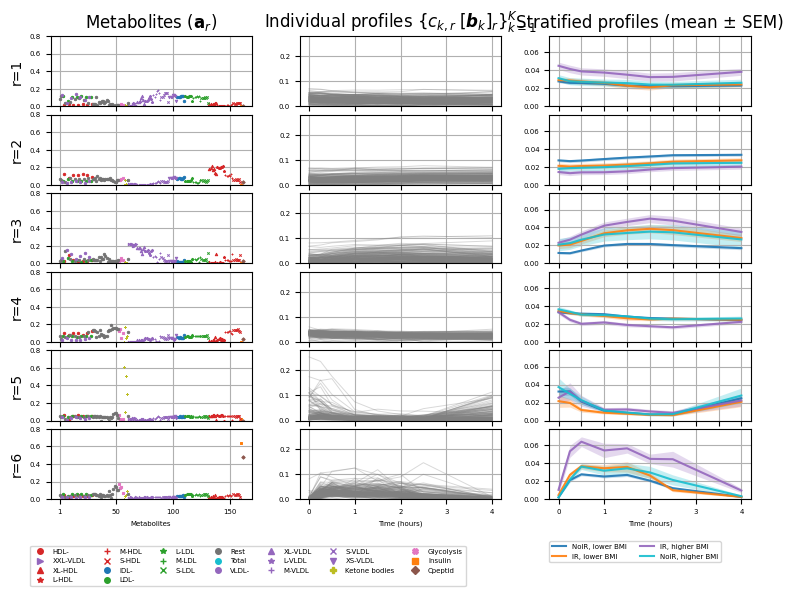

In [ ]:
# This can be used to reproduce the following figures of the paper:
# ⚠️ make sure the appropriate metadata is loaded from the previous cell!
# Fig. 2. model: 'cmf', n_components: 6, gender: 'males'
# Fig. S.2 model: 'cp', n_components: 6, gender: 'males'
# Fig. S.3 model: 'parafac2', n_components: 6, gender: 'males'
# Fig. S.5 model: 'cmf', n_components: 6, gender: 'females'
# Fig. S.6 model: 'parafac2', n_components: 6, gender: 'females'
# Fig. S.7 model: 'cp', n_components: 6, gender: 'females'

model = 'cmf' # can be 'cmf', 'cp' or 'parafac2'
n_components = 6
gender = 'males' # can be either 'males' or 'females'

#####################################################################

with open(f'Metabolomics/results/uniqueness/factors_{model}_{n_components}_components_l_B_0.0_{gender}.pkl', 'rb') as f:
    results = pickle.load(f)

A = results[0][0][2]
C = results[0][0][0]
if model != 'cp':
    B = results[0][0][1]
else:
    B = [deepcopy(results[0][0][1]) for _ in range(A.shape[0])]

if model == 'cp': # if model is 'cp' the order of the factors needs to be changed
    (A,B,C) = (C,B,A)

fig, axs = plt.subplots(
    n_components, 3,
    figsize=(8,0.65 * 8),
    constrained_layout=False
)

fig.subplots_adjust(
    left=0.06, right=0.935, bottom=0.08, top=0.97,
    wspace=0.24, hspace=0.12
)

for i, comp in enumerate([5,3,1,4,0,2]): # keep the same ordering as in the paper
    if i == 0: 
        plot_metabolite_component(factors=(A,B,C),comp=comp, metabolites=metabolites,axes=axs[i,0],plot_title=True,comp_i=i)
        plot_metabolomics_profile_component(factors=(A,B,C),comp=comp,axes=axs[i,1],comp_i=i,plot_title=True,time_points=[0,0.25,0.5,1,1.5,2,2.5,4])
        plot_metabolomics_stratified_profiles_component(factors=(A,B,C),comp=comp,axes=axs[i,2],plot_title=True,group=group,time_points=[0,0.25,0.5,1,1.5,2,2.5,4])
    elif i == 5: 
        plot_metabolite_component(factors=(A,B,C),comp=comp,metabolites=metabolites,axes=axs[i,0],plot_xticks=True,plot_legend=True,comp_i=i)
        plot_metabolomics_profile_component(factors=(A,B,C),comp=comp,axes=axs[i,1],comp_i=i,plot_legend=True,plot_xticks=True,time_points=[0,0.25,0.5,1,1.5,2,2.5,4])
        plot_metabolomics_stratified_profiles_component(factors=(A,B,C),comp=comp,axes=axs[i,2],plot_legend=True,plot_xticks=True,group=group,time_points=[0,0.25,0.5,1,1.5,2,2.5,4])
    else: 
        plot_metabolite_component(factors=(A,B,C),comp=comp,metabolites=metabolites,axes=axs[i,0],comp_i=i)
        plot_metabolomics_profile_component(factors=(A,B,C),comp=comp,axes=axs[i,1],comp_i=i,time_points=[0,0.25,0.5,1,1.5,2,2.5,4])
        plot_metabolomics_stratified_profiles_component(factors=(A,B,C),comp=comp,axes=axs[i,2],group=group,time_points=[0,0.25,0.5,1,1.5,2,2.5,4])


axs[0,0].set_xticks([0,49,99,149])
axs[1,0].set_xticks([0,49,99,149])
axs[2,0].set_xticks([0,49,99,149])
axs[3,0].set_xticks([0,49,99,149])
axs[4,0].set_xticks([0,49,99,149])
axs[5,0].set_xticks([0,49,99,149])

plt.show()

/tmp/ipykernel_10586/1184301921.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels([2,3,4,5,6,7,8]*3, fontsize=5)
/tmp/ipykernel_10586/1184301921.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels([2,3,4,5,6,7,8]*3, fontsize=5)


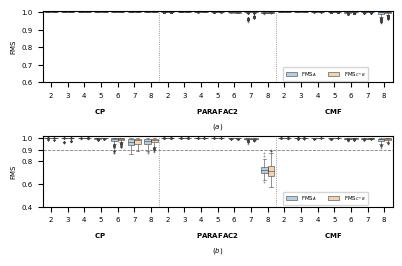

In [31]:
# This can be used to reproduce the following figures of the paper:
# Fig. 5. gender: 'males'
# Requires the following files:
# - Metabolomics/df_A_uniq_males.pkl
# - Metabolomics/df_CB_uniq_males.pkl
# - Metabolomics/df_A_replic_males.pkl
# - Metabolomics/df_CB_replic_males.pkl
# which are obtained after runing uniqueness_analysis_metabolomics.ipynb and replicability_analysis_metabolomics.ipynb.
# Fig. S.3 gender: 'females'
# Requires the following files:
# - Metabolomics/df_A_uniq_females.pkl
# - Metabolomics/df_CB_uniq_females.pkl
# - Metabolomics/df_A_replic_females.pkl
# - Metabolomics/df_CB_replic_females.pkl
# which are obtained after runing uniqueness_analysis_metabolomics.ipynb and replicability_analysis_metabolomics.ipynb.

gender = 'males'

#####################################################################


box_kws = dict(
    width=0.8,
    linewidth=0.6,
    showfliers=True,
    fliersize=0.8,

    flierprops=dict(
        marker='o',
        markersize=0.8,
        markeredgewidth=0.4,
        alpha=0.7,
    ),
    boxprops=dict(linewidth=0.4),
    whiskerprops=dict(linewidth=0.4),
    capprops=dict(linewidth=0.4),
    medianprops=dict(linewidth=0.4),
)


fig, axs = plt.subplots(
    2, 1,
    figsize=(4,0.65* 4),
    sharex=False, sharey=False,
)

dfa = pd.read_pickle(f"Metabolomics/df_A_uniq_{gender}.pkl")
dfc = pd.read_pickle(f"Metabolomics/df_CB_uniq_{gender}.pkl")
df_long = pd.concat([dfa, dfc], ignore_index=True)

order =  ['cp_2_0.0', 'cp_3_0.0', 'cp_4_0.0', 'cp_5_0.0', 'cp_6_0.0','cp_7_0.0', 'cp_8_0.0',
    'parafac2_2_0.0', 'parafac2_3_0.0', 'parafac2_4_0.0', 'parafac2_5_0.0', 'parafac2_6_0.0', 'parafac2_7_0.0', 'parafac2_8_0.0',
             'cmf_2_0.0', 'cmf_3_0.0', 'cmf_4_0.0', 'cmf_5_0.0', 'cmf_6_0.0', 'cmf_7_0.0', 'cmf_8_0.0']

df_long["metric"] = df_long["metric"].replace({"CB": "C*B"})
df_long["metric"] = df_long["metric"].replace({"C*B": r"$\text{FMS}_{C*B}$"})
df_long["metric"] = df_long["metric"].replace({"A": r"$\text{FMS}_{A}$"})

ax = sns.boxplot(
    data=df_long, x='label', y='value', hue='metric',
    ax=axs[0],order=order,**box_kws
)

for patch in ax.patches:
    r, g, b, _ = mpl.colors.to_rgba(patch.get_facecolor())
    patch.set_facecolor((r, g, b, 0.35))

handles, labels = ax.get_legend_handles_labels()
k = df_long['metric'].nunique()  # should be 2
axs[0].legend(handles[:k], labels[:k], bbox_to_anchor=(0.68, 0.25),ncols=2,fontsize=4)
axs[0].text(0.165, -0.4, r'$\bf{CP}$', ha='center', va='center', transform=axs[0].transAxes,fontsize=5)
axs[0].text(0.5, -0.4, r'$\bf{PARAFAC2}$', ha='center', va='center', transform=axs[0].transAxes,fontsize=5)
axs[0].text(0.83, -0.4, r'$\bf{CMF}$', ha='center', va='center', transform=axs[0].transAxes,fontsize=5)
axs[0].axvline(x=6.5, color='tab:gray', linestyle=':',linewidth=0.6)
axs[0].axvline(x=13.5, color='tab:gray', linestyle=':',linewidth=0.6)

axs[0].set_xticklabels([2,3,4,5,6,7,8]*3, fontsize=5)
axs[0].set_xlabel('')
axs[0].set_ylim(0.8,1.005)
axs[0].set_ylabel('FMS',fontsize=5)
axs[0].set_yticks([0.6,0.7,0.8,0.9,1.0],labels=[0.6,0.7,0.8,0.9,1.0],fontsize=5)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.8)
    spine.set_edgecolor("black")

dfa = pd.read_pickle(f"Metabolomics/df_A_replic_{gender}.pkl")
dfc = pd.read_pickle(f"Metabolomics/df_CB_replic_{gender}.pkl")
df_long = pd.concat([dfa, dfc], ignore_index=True)

order =  ['cp_2_0.0_10', 'cp_3_0.0_10', 'cp_4_0.0_10', 'cp_5_0.0_10', 'cp_6_0.0_10', 'cp_7_0.0_10', 'cp_8_0.0_10',
    'parafac2_2_0.0_10', 'parafac2_3_0.0_10', 'parafac2_4_0.0_10', 'parafac2_5_0.0_10', 'parafac2_6_0.0_10', 'parafac2_7_0.0_10', 'parafac2_8_0.0_10',
             'cmf_2_0.0_10', 'cmf_3_0.0_10', 'cmf_4_0.0_10', 'cmf_5_0.0_10', 'cmf_6_0.0_10', 'cmf_7_0.0_10', 'cmf_8_0.0_10']

df_long["metric"] = df_long["metric"].replace({"CB": "C*B"})
df_long["metric"] = df_long["metric"].replace({"C*B": r"$\text{FMS}_{C*B}$"})
df_long["metric"] = df_long["metric"].replace({"A": r"$\text{FMS}_{A}$"})
 
ax = sns.boxplot(
    data=df_long, x='label', y='value', hue='metric',
    ax=axs[1],order=order,**box_kws
)

# Make the boxes semi-transparent
for patch in ax.patches:  # PathPatches
    r, g, b, _ = mpl.colors.to_rgba(patch.get_facecolor())
    patch.set_facecolor((r, g, b, 0.35))

handles, labels = ax.get_legend_handles_labels()
k = df_long['metric'].nunique()  # should be 2
axs[1].legend(handles[:k], labels[:k], bbox_to_anchor=(0.68, 0.25),ncols=2,fontsize=4)
axs[1].text(0.165, -0.4, r'$\bf{CP}$', ha='center', va='center', transform=axs[1].transAxes,fontsize=5)
axs[1].text(0.5, -0.4, r'$\bf{PARAFAC2}$', ha='center', va='center', transform=axs[1].transAxes,fontsize=5)
axs[1].text(0.83, -0.4, r'$\bf{CMF}$', ha='center', va='center', transform=axs[1].transAxes,fontsize=5)
axs[1].axvline(x=6.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0)
axs[1].axvline(x=13.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0)
axs[1].set_xticklabels([2,3,4,5,6,7,8]*3, fontsize=5)
axs[1].axhline(y=0.9, color='gray', linestyle='--',linewidth=0.6,zorder=0)
axs[1].set_yticks([0.4,0.6,0.8,0.9,1.0],labels=[0.4,0.6,0.8,0.9,1.0],fontsize=5)
axs[1].set_ylabel('FMS',fontsize=5)
axs[1].set_xlabel('')

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.8)
    spine.set_edgecolor("black")

axs[0].text(
    0.5, -0.62, r'$(a)$',
    ha='center', va='center',
    transform=axs[0].transAxes,
    fontsize=5,
    clip_on=False
)

axs[1].text(
    0.5, -0.62, r'$(b)$',
    ha='center', va='center',
    transform=axs[1].transAxes,
    fontsize=5,
    clip_on=False
)

for ax in (axs[0], axs[1]):
    ax.tick_params(axis="both", labelsize=5)

fig.tight_layout(pad=0.02)  # OK: does NOT change figure size
fig.subplots_adjust(wspace=0.8, hspace=0.75,top=0.99,right=0.99,left=0.115)
plt.show()

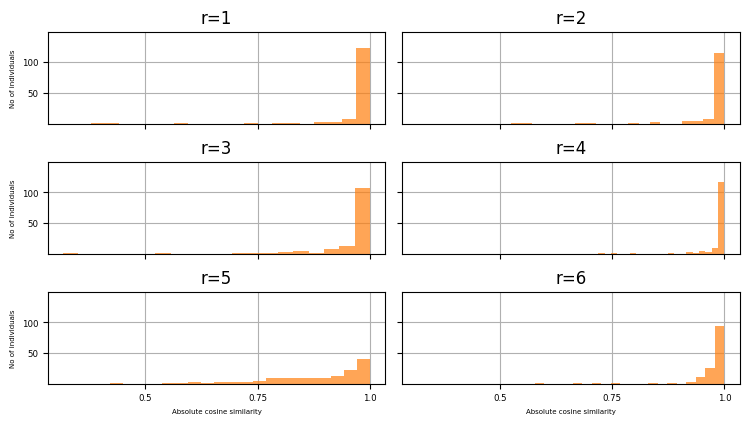

In [35]:
# This can be used to reproduce the following figures of the paper:
# Fig. S.6: gender: males

gender = 'males'

#####################################################################

tol = 1e-4
no_of_components = 6

fmss_per_comp = {0: [],1: [],2: [], 3: [], 4:[],5:[]}

with open(f'Metabolomics/results/uniqueness/factors_cmf_{no_of_components}_components_l_B_0.0_{gender}.pkl', 'rb') as f:
    results_cmf = pickle.load(f)

(A1,B1,D1) = results_cmf[0][0]

with open(f'Metabolomics/results/uniqueness/factors_parafac2_{no_of_components}_components_l_B_0.0_{gender}.pkl', 'rb') as f:
    results_parafac2 = pickle.load(f)

(A2,B2,D2) = results_parafac2[0][0]

A1, B1, D1 = get_profiles_factors((D1,B1,A1))
A2, B2, D2 = get_profiles_factors((D2,B2,A2))

B1 = [b[:,[5,3,1,4,0,2]] for b in B1]

B1_bar = np.vstack(B1)
B2_bar = np.vstack(B2)

perm = congruence_coefficient(B1_bar,B2_bar)[1]

for k in range(len(B1)): # for each subject
    for r in range(B1[0].shape[1]): # for each component
        fmss_per_comp[r].append(congruence_coefficient(B1[k][:,r].reshape(-1,1),B2[k][:,perm[r]].reshape(-1,1))[0])


fig, axs = plt.subplots(
    3, 2,
    figsize=(8,4),
    sharex=True, sharey=False,
)

for ax in axs.flatten():
    ax.set_axisbelow(True)
    ax.grid(True, zorder=0)
    ax.set_ylim([0,150])
    ax.set_yticks([50,100],labels=[50,100],fontsize=6.25)
    ax.set_xticks([0,0.25,0.5,0.75,1.0],[0,0.25,0.5,0.75,1.0],fontsize=6.25)

axs[0,0].hist(fmss_per_comp[0],color='tab:orange',alpha=0.7,bins=20)
axs[0,0].set_title(f'r={1}')
axs[0,0].set_ylabel('No of individuals',fontsize=5)

axs[0,1].hist(fmss_per_comp[1],color='tab:orange',alpha=0.7,bins=20)
axs[0,1].set_title(f'r={2}')
axs[0,1].set_yticklabels([])

axs[1,0].hist(fmss_per_comp[2],color='tab:orange',alpha=0.7,bins=20)
axs[1,0].set_title(f'r={3}')
axs[1,0].set_ylabel('No of individuals',fontsize=5)

axs[1,1].hist(fmss_per_comp[3],color='tab:orange',alpha=0.7,bins=20)
axs[1,1].set_title(f'r={4}')
axs[1,1].set_yticklabels([])

axs[2,0].hist(fmss_per_comp[4],color='tab:orange',alpha=0.7,bins=20)
axs[2,0].set_title(f'r={5}')
axs[2,0].set_ylabel('No of individuals',fontsize=5)
axs[2,0].set_xlabel(r'Absolute cosine similarity',fontsize=5)

axs[2,1].hist(fmss_per_comp[5],color='tab:orange',alpha=0.7,bins=20)
axs[2,1].set_title(f'r={6}')
axs[2,1].set_yticklabels([])
axs[2,1].set_xlabel(r'Absolute cosine similarity',fontsize=5)

fig.subplots_adjust(wspace=0.05, hspace=0.415,top=0.99,right=0.98,left=0.115)
plt.show()

# Sensitization

In [2]:
df = pd.read_csv('Sensitization/metadata_safe.csv')
meta = df['Delivery(Natural(1)/C-section(2)/Vacuum(3))'].to_numpy()
allergens = ['Mugwort','Birch','Molds','Timothy grass','Wheat flour', 'Milk','Peanut','Egg','Dog','Cat','D.pteronyssinus']
allergens.reverse()

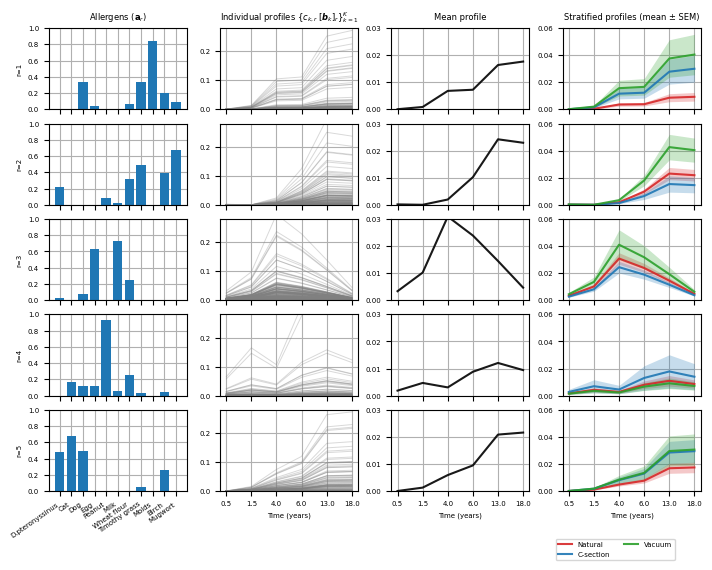

In [ ]:
# This can be used to reproduce the following figures of the paper:
# ⚠️ make sure the appropriate metadata is loaded from the previous cell!
# Fig. 6. model: 'cmf', n_components: 5
# Fig. S.8 model: 'parafac2', n_components: 5
# Fig. S.9 model: 'cp', n_components: 5

model = 'cmf'
n_components = 5

#####################################################################

with open(f'Sensitization/results/uniqueness/factors_{model}_{n_components}_components_l_B_0.0.pkl', 'rb') as f:
    results = pickle.load(f)

if model == 'cp': 
    A = results[0][0][0]
    C = results[0][0][2]
else:
    A = results[0][0][2]
    C = results[0][0][0]

if model != 'cp':
    B = results[0][0][1]
else:
    B = [deepcopy(results[0][0][1]) for _ in range(C.shape[0])]


fig, axs = plt.subplots(
    5, 4,
    figsize=(8,0.65 * 8),
    constrained_layout=False
)

fig.subplots_adjust(
    left=0.06, right=0.875, bottom=0.08, top=0.97,
    wspace=0.24, hspace=0.175
)

for i, comp in enumerate([3,0,2,1,4]): # same order as in the paper
    if i == 0: 
        plot_allergens_component(factors=(A,B,C),comp=comp, allergens=allergens, axes=axs[i,0],plot_title=True,comp_i=i)
        plot_sensitization_profiles_component(factors=(A,B,C),comp=comp,axes=axs[i,1],comp_i=i,plot_title=True,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
        plot_sensitization_mean_profile_component(factors=(A,B,C),comp=comp,axes=axs[i,2],plot_title=True,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
        plot_sensitization_profiles_stratified_component(factors=(A,B,C),comp=comp,axes=axs[i,3],meta=meta,plot_title=True,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
    elif i == 4: 
        plot_allergens_component(factors=(A,B,C),comp=comp,allergens=allergens,axes=axs[i,0],plot_xticks=True,plot_legend=True,comp_i=i)
        plot_sensitization_profiles_component(factors=(A,B,C),comp=comp,axes=axs[i,1],comp_i=i,plot_legend=True,plot_xticks=True,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
        plot_sensitization_mean_profile_component(factors=(A,B,C),comp=comp,axes=axs[i,2],plot_legend=True,plot_xticks=True,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
        plot_sensitization_profiles_stratified_component(factors=(A,B,C),meta=meta,comp=comp,axes=axs[i,3],plot_legend=True,plot_xticks=True,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
    else: 
        plot_allergens_component(factors=(A,B,C),comp=comp,allergens=allergens,axes=axs[i,0],comp_i=i)
        plot_sensitization_profiles_component(factors=(A,B,C),comp=comp,axes=axs[i,1],comp_i=i,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
        plot_sensitization_mean_profile_component(factors=(A,B,C),comp=comp,axes=axs[i,2],plot_legend=True,plot_xticks=True,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
        plot_sensitization_profiles_stratified_component(factors=(A,B,C),meta=meta,comp=comp,axes=axs[i,3],time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])

for ax in fig.axes:
    # Tick labels
    ax.tick_params(axis="both", which="both", labelsize=5)

    # Axes title + axis labels
    ax.title.set_fontsize(6)
    ax.xaxis.label.set_fontsize(5)
    ax.yaxis.label.set_fontsize(5)

    leg = ax.get_legend()
    if leg is not None:
        for t in leg.get_texts():
            t.set_fontsize(5)
        if leg.get_title() is not None:
            leg.get_title().set_fontsize(5)


axs[0,2].set_xticklabels([])
axs[1,2].set_xticklabels([])
axs[2,2].set_xticklabels([])
axs[3,2].set_xticklabels([])

plt.show()

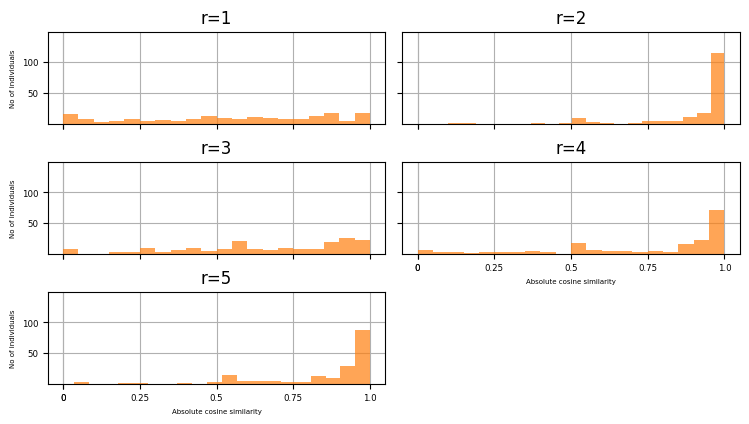

In [11]:
# This can be used to reproduce the following figures of the paper:
# Fig. S.10:

tol = 1e-4
no_of_components = 5

fmss_per_comp = {0: [],1: [],2: [], 3: [], 4:[]}

with open(f'Sensitization/results/uniqueness/factors_cmf_{no_of_components}_components_l_B_0.0.pkl', 'rb') as f:
    results_cmf = pickle.load(f)

(A1,B1,D1) = results_cmf[0][0]

with open(f'Sensitization/results/uniqueness/factors_parafac2_{no_of_components}_components_l_B_0.0.pkl', 'rb') as f:
    results_parafac2 = pickle.load(f)

(A2,B2,D2) = results_parafac2[0][0]

A1, B1, D1 = get_profiles_factors((D1,B1,A1))
A2, B2, D2 = get_profiles_factors((D2,B2,A2))

B1 = [b[:,[3,0,2,1,4]] for b in B1]

B1_bar = np.vstack(B1)
B2_bar = np.vstack(B2)

perm = congruence_coefficient(B1_bar,B2_bar)[1]

for k in range(len(B1)): # for each subject
    for r in range(B1[0].shape[1]): # for each component
        fmss_per_comp[r].append(congruence_coefficient(B1[k][:,r].reshape(-1,1),B2[k][:,perm[r]].reshape(-1,1))[0])


fig, axs = plt.subplots(
    3, 2,
    figsize=(8,4),
    sharex=True, sharey=False,
)

for ax in axs.flatten():
    ax.set_axisbelow(True)
    ax.grid(True, zorder=0)
    ax.set_ylim([0,150])
    ax.set_yticks([50,100],labels=[50,100],fontsize=6.25)
    ax.set_xticks([0,0,0.25,0.5,0.75,1.0],[0,0,0.25,0.5,0.75,1.0],fontsize=6.25)

axs[0,0].hist(fmss_per_comp[0],color='tab:orange',alpha=0.7,bins=20)
axs[0,0].set_title(f'r={1}')
axs[0,0].set_ylabel('No of individuals',fontsize=5)

axs[0,1].hist(fmss_per_comp[1],color='tab:orange',alpha=0.7,bins=20)
axs[0,1].set_title(f'r={2}')
axs[0,1].set_yticklabels([])

axs[1,0].hist(fmss_per_comp[2],color='tab:orange',alpha=0.7,bins=20)
axs[1,0].set_title(f'r={3}')
axs[1,0].set_ylabel('No of individuals',fontsize=5)

axs[1,1].hist(fmss_per_comp[3],color='tab:orange',alpha=0.7,bins=20)
axs[1,1].set_title(f'r={4}')
axs[1,1].set_yticklabels([])

axs[2,0].hist(fmss_per_comp[4],color='tab:orange',alpha=0.7,bins=20)
axs[2,0].set_title(f'r={5}')
axs[2,0].set_ylabel('No of individuals',fontsize=5)
axs[2,0].set_xlabel(r'Absolute cosine similarity',fontsize=5)

axs[2,1].axis('off')
axs[1,1].set_xlabel(r'Absolute cosine similarity',fontsize=5)
axs[1,1].tick_params(axis='x', labelbottom=True, labelsize=6.25)  # <-- key

fig.subplots_adjust(wspace=0.05, hspace=0.415,top=0.99,right=0.98,left=0.115)

plt.show()

/tmp/ipykernel_46210/3276134759.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels([2,3,4,5,6]*3, fontsize=5)
/tmp/ipykernel_46210/3276134759.py:112: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels([2,3,4,5,6]*3, fontsize=5)


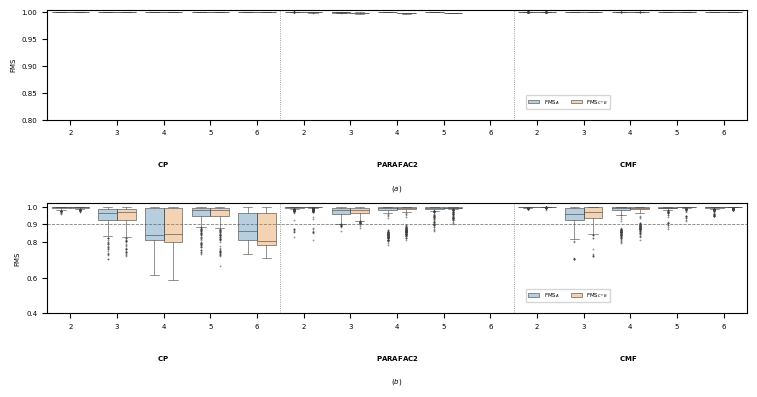

In [ ]:
# This can be used to reproduce the following figures of the paper:
# Fig. 8

box_kws = dict(
    width=0.8,
    linewidth=0.6,
    showfliers=True,
    fliersize=0.8,

    flierprops=dict(
        marker='o',
        markersize=0.8,
        markeredgewidth=0.4,
        alpha=0.7,
    ),
    boxprops=dict(linewidth=0.4),
    whiskerprops=dict(linewidth=0.4),
    capprops=dict(linewidth=0.4),
    medianprops=dict(linewidth=0.4),
)


fig, axs = plt.subplots(
    2, 1,
    figsize=(8,4),
    sharex=False, sharey=False,
)

dfa = pd.read_pickle(f"Sensitization/df_A_uniq.pkl")
dfc = pd.read_pickle(f"Sensitization/df_CB_uniq.pkl")
df_long = pd.concat([dfa, dfc], ignore_index=True)

order =  ['cp_2_0.0', 'cp_3_0.0', 'cp_4_0.0', 'cp_5_0.0', 'cp_6_0.0',
    'parafac2_2_0.0', 'parafac2_3_0.0', 'parafac2_4_0.0', 'parafac2_5_0.0', 'parafac2_6_0.0',
             'cmf_2_0.0', 'cmf_3_0.0', 'cmf_4_0.0', 'cmf_5_0.0', 'cmf_6_0.0']


df_long["metric"] = df_long["metric"].replace({"CB": "C*B"})
df_long["metric"] = df_long["metric"].replace({"C*B": r"$\text{FMS}_{C*B}$"})
df_long["metric"] = df_long["metric"].replace({"A": r"$\text{FMS}_{A}$"})

# drop rows with model == 'parafac2' and rank == 6
df_long = df_long[~((df_long['model'] == 'parafac2') & (df_long['r'] == 6))]

ax = sns.boxplot(
    data=df_long, x='label', y='value', hue='metric',
    ax=axs[0],order=order,**box_kws
)

# Make the boxes semi-transparent
for patch in ax.patches:  # PathPatches
    r, g, b, _ = mpl.colors.to_rgba(patch.get_facecolor())
    patch.set_facecolor((r, g, b, 0.35))

handles, labels = ax.get_legend_handles_labels()
k = df_long['metric'].nunique()  # should be 2
axs[0].legend(handles[:k], labels[:k], bbox_to_anchor=(0.68, 0.25),ncols=2,fontsize=4)
axs[0].text(0.165, -0.4, r'$\bf{CP}$', ha='center', va='center', transform=axs[0].transAxes,fontsize=5)
axs[0].text(0.5, -0.4, r'$\bf{PARAFAC2}$', ha='center', va='center', transform=axs[0].transAxes,fontsize=5)
axs[0].text(0.83, -0.4, r'$\bf{CMF}$', ha='center', va='center', transform=axs[0].transAxes,fontsize=5)
axs[0].axvline(x=4.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # Sensitization
axs[0].axvline(x=9.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # Sensitization

axs[0].set_xticklabels([2,3,4,5,6]*3, fontsize=5)
axs[0].set_xlabel('')
axs[0].set_ylim(0.8,1.005)
axs[0].set_ylabel('FMS',fontsize=5)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.8)
    spine.set_edgecolor("black")

dfa = pd.read_pickle("Sensitization/df_A_replic.pkl")
dfc = pd.read_pickle("Sensitization/df_CB_replic.pkl")
df_long = pd.concat([dfa, dfc], ignore_index=True)

order =  ['cp_2_0.0_10', 'cp_3_0.0_10', 'cp_4_0.0_10', 'cp_5_0.0_10', 'cp_6_0.0_10',
    'parafac2_2_0.0_10', 'parafac2_3_0.0_10', 'parafac2_4_0.0_10', 'parafac2_5_0.0_10', 'parafac2_6_0.0_10',
             'cmf_2_0.0_10', 'cmf_3_0.0_10', 'cmf_4_0.0_10', 'cmf_5_0.0_10', 'cmf_6_0.0_10']

df_long["metric"] = df_long["metric"].replace({"CB": "C*B"})
df_long["metric"] = df_long["metric"].replace({"C*B": r"$\text{FMS}_{C*B}$"})
df_long["metric"] = df_long["metric"].replace({"A": r"$\text{FMS}_{A}$"})

# drop rows with model == 'parafac2' and rank == 6
df_long = df_long[~((df_long['model'] == 'parafac2') & (df_long['r'] == 6))]
 
ax = sns.boxplot(
    data=df_long, x='label', y='value', hue='metric',
    ax=axs[1],order=order,**box_kws
)

# Make the boxes semi-transparent
for patch in ax.patches:  # PathPatches
    r, g, b, _ = mpl.colors.to_rgba(patch.get_facecolor())
    patch.set_facecolor((r, g, b, 0.35))

# Single legend (for metric)
handles, labels = ax.get_legend_handles_labels()
# first k handles/labels correspond to 'metric' from the first layer (boxplot)
k = df_long['metric'].nunique()  # should be 2
axs[1].legend(handles[:k], labels[:k], bbox_to_anchor=(0.68, 0.25),ncols=2,fontsize=4) # metabolomics
# axs[1].legend(handles[:k], labels[:k], bbox_to_anchor=(0.68, 0.18),ncols=2,fontsize=4) #sensitizations
axs[1].text(0.165, -0.4, r'$\bf{CP}$', ha='center', va='center', transform=axs[1].transAxes,fontsize=5)
axs[1].text(0.5, -0.4, r'$\bf{PARAFAC2}$', ha='center', va='center', transform=axs[1].transAxes,fontsize=5)
axs[1].text(0.83, -0.4, r'$\bf{CMF}$', ha='center', va='center', transform=axs[1].transAxes,fontsize=5)
axs[1].axvline(x=4.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # Sensitization
axs[1].axvline(x=9.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # Sensitization


axs[1].set_xticklabels([2,3,4,5,6]*3, fontsize=5)
axs[1].axhline(y=0.9, color='gray', linestyle='--',linewidth=0.6,zorder=0)
# axs[1].set_ylim(0.5,1.005) # Metabolomics
# axs[1].set_ylim(0.8,1.005) # Sensitizations
axs[1].set_yticks([0.4,0.6,0.8,0.9,1.0],labels=[0.4,0.6,0.8,0.9,1.0],fontsize=5)
axs[1].set_ylabel('FMS',fontsize=5)
axs[1].set_xlabel('')
# axs[1].text(0.5, -0.2, '(b)',fontsize=5)
# axs[1].grid(True)
# axs[1].set_title('Replicability results')

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.8)
    spine.set_edgecolor("black")

axs[0].text(
    0.5, -0.62, r'$(a)$',
    ha='center', va='center',
    transform=axs[0].transAxes,
    fontsize=5,
    clip_on=False
)

axs[1].text(
    0.5, -0.62, r'$(b)$',
    ha='center', va='center',
    transform=axs[1].transAxes,
    fontsize=5,
    clip_on=False
)

for ax in (axs[0], axs[1]):
    ax.tick_params(axis="both", labelsize=5)

fig.tight_layout(pad=0.02)  # OK: does NOT change figure size
fig.subplots_adjust(wspace=0.8, hspace=0.75,top=0.99,right=0.99,left=0.115)